In [1]:
# import librarires
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pickle
from torchvision import models

import os
from custom_dataset import CustomDataset

c:\Users\andre\anaconda3\envs\leaf_cse120_20240303\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
def get_directories(path):
    # Get list of all files and directories in the given path
    contents = os.listdir(path)
    
    # Filter out only directories
    directories = [content for content in contents if os.path.isdir(os.path.join(path, content))]
    
    return directories

In [3]:
CATEGORIES = get_directories('./train')

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
train_data = pickle.load(open('./train_data.pickle', 'rb'))
val_data = pickle.load(open('./val_data.pickle', 'rb'))

In [6]:
new_train_data = CustomDataset(train_data)
new_val_data = CustomDataset(val_data)

In [7]:
cnn = models.resnet18(pretrained = True)
# weight
num_ftrs = cnn.fc.in_features # 512
print(num_ftrs)

cnn.fc= nn.Linear(num_ftrs,len(CATEGORIES)) ## ??
cnn.to(device)
num_epochs = 3

c:\Users\andre\anaconda3\envs\leaf_cse120_20240303\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\andre\anaconda3\envs\leaf_cse120_20240303\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


512


In [8]:
# Define your loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)




# Define your data loaders
train_loader = torch.utils.data.DataLoader(new_train_data, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(new_val_data, batch_size=64, shuffle=False)



In [9]:
# Train the model
cnn.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    
    # Print current epoch
    print(f"Epoch {epoch+1}/{num_epochs}")
    
    # Iterate over the training dataset
    for i, (inputs, labels) in enumerate(train_loader, 1):
        # Move data to the appropriate device (GPU if available)
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        # inputs = inputs.float() / 255.0  # Convert inputs to float format
        outputs = cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
        # Print progress every 100 mini-batches
        if i % 100 == 0:
            print(f"Mini-batch {i}/{len(train_loader)}, Loss: {loss.item():.3f}, Accuracy: {(100*correct/total):.2f}%")

    # Print average loss and accuracy for the epoch
    print(f"Epoch {epoch+1} - Average Loss: {running_loss/len(train_loader):.3f}, Accuracy: {(100*correct/total):.2f}%")


Epoch 1/3
Epoch 1 - Average Loss: 2.613, Accuracy: 0.00%
Epoch 2/3
Epoch 2 - Average Loss: 2.439, Accuracy: 0.00%
Epoch 3/3
Epoch 3 - Average Loss: 2.131, Accuracy: 0.00%


In [10]:


# Validate the model
cnn.eval()
val_correct = 0
val_total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        # inputs = inputs.float() / 255.0
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = cnn(inputs)
        _, predicted = outputs.max(1)
        val_total += labels.size(0)
        val_correct += predicted.eq(labels).sum().item()

print(f"Validation Accuracy: {(100*val_correct/val_total):.2f}%")


Validation Accuracy: 0.00%


In [11]:
# def compute_confusion_matrix(model, loader):
#     model.eval()
    
#     all_predicted = []
#     all_labels = []

#     with torch.no_grad():
#         for images, labels in loader:
#             images = images.float() / 255.0  # Normalize images
#             labels = labels.long()  # Convert labels to the appropriate data type
            
#             outputs, _ = model(images)
#             _, predicted = torch.max(outputs.data, 1)
            
#             # Collect predicted labels and true labels for confusion matrix
#             all_predicted.extend(predicted.cpu().numpy())
#             all_labels.extend(labels.cpu().numpy())
    
#     cm = confusion_matrix(all_labels, all_predicted)
    
#     return cm

In [12]:
# # training and validating
# num_epochs = 3

# train_acc_data = []
# loss_data = []
# val_acc_data = []
# val_loss_data = []
# epochs_arr = []

# train(num_epochs, cnn, loaders, device)

NameError: name 'train_acc_data' is not defined

<Figure size 1000x500 with 0 Axes>

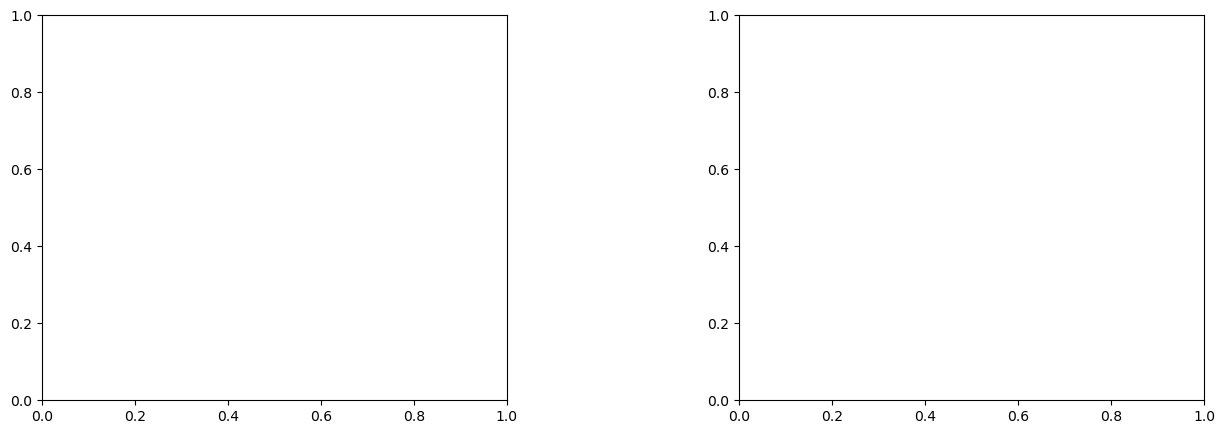

In [13]:
# performance analysis (loss, accuracy, cm)
plt.figure(figsize=(10,5))
fig, axs = plt.subplots(1,2, figsize=(15, 5), gridspec_kw={'wspace': 0.5})

axs[0].plot(train_acc_data, label='Train')
axs[0].plot(val_acc_data, label='Val')
axs[0].set_title('Train vs Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()


axs[1].plot(loss_data, label='Train Loss')
axs[1].plot(val_loss_data, label='Val Loss')
axs[1].set_title('Train Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
plt.show()